Testing


In [3]:
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 759, done.
remote: Total 759 (delta 0), reused 0 (delta 0), pack-reused 759 (from 1)
Receiving objects: 100% (759/759), 5.39 MiB | 14.91 MiB/s, done.
Resolving deltas: 100% (407/407), done.
/content/Real-ESRGAN


In [4]:
# Install basicsr - https://github.com/xinntao/BasicSR
# We use BasicSR for both training and inference
!pip install basicsr
# facexlib and gfpgan are for face enhancement
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_

In [11]:
!pip show basicsr | grep Location


Location: /usr/local/lib/python3.11/dist-packages


In [12]:
!sed -i "s|from torchvision.transforms.functional_tensor import rgb_to_grayscale|from torchvision.transforms.functional import rgb_to_grayscale|" \
  /usr/local/lib/python3.11/dist-packages/basicsr/data/degradations.py


In [13]:
!python inference_realesrgan.py -n RealESRGAN_x4plus -i infile --outscale 3.5 --face_enhance

Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth" to /content/Real-ESRGAN/weights/RealESRGAN_x4plus.pth

100% 63.9M/63.9M [00:00<00:00, 319MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /content/Real-ESRGAN/gfpgan/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:00<00:00, 349MB/s]
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.2.2/parsing_

In [15]:
# from google.colab import files

# uploaded = files.upload()  # a little “Choose Files” button will pop up
# # uploaded is a dict: { filename: file‑bytes }
# for fn in uploaded:
#     print(f"✅ Uploaded {fn}")


Saving 37054504-089d7a00-214d-11e8-8982-ca836f7a4460.jpg to 37054504-089d7a00-214d-11e8-8982-ca836f7a4460.jpg
✅ Uploaded 37054504-089d7a00-214d-11e8-8982-ca836f7a4460.jpg


In [16]:
# !python inference_realesrgan.py \
#   -n RealESRGAN_x4plus \
#   -i 37054504-089d7a00-214d-11e8-8982-ca836f7a4460.jpg \
#   --outscale 3.5 \
#   --face_enhance


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Testing 0 37054504-089d7a00-214d-11e8-8982-ca836f7a4460


In [33]:
from google.colab import files
import os, glob

# 1) Upload into LR/
uploaded = files.upload()
os.makedirs('LR', exist_ok=True)
for fname, bytes_data in uploaded.items():
    with open(os.path.join('LR', fname), 'wb') as f:
        f.write(bytes_data)
print(f"✅ Uploaded {len(uploaded)} files into LR/")

Saving 37054504-089d7a00-214d-11e8-8982-ca836f7a4460.jpg to 37054504-089d7a00-214d-11e8-8982-ca836f7a4460 (2).jpg
Saving ILSVRC2012_val_00000001.JPEG to ILSVRC2012_val_00000001 (1).JPEG
✅ Uploaded 2 files into LR/


In [25]:
# import os
# import glob

# input_folder = "LR"

# for img_path in glob.glob(os.path.join(input_folder, "*")):
#     if not img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
#         continue

#     # strip off "LR/" so you're left with just the filename
#     filename = os.path.basename(img_path)         # e.g. "3705… (1).jpg"
#     name, ext = os.path.splitext(filename)        # name="3705… (1)", ext=".jpg"

#     # build your upscaled filename (no LR/ in front)
#     out_filename = f"{name}_upscaled{ext}"        # "3705… (1)_upscaled.jpg"
#     out_path = out_filename                       # literally just the filename

#     print(out_path)
#     # ↓ if you actually want to run ESRGAN and save here, you could do:
#     # os.system(
#     #     f'python inference_realesrgan.py -n RealESRGAN_x4plus '
#     #     f'-i "{img_path}" --outdir "." --suffix _upscaled '
#     #     f'--outscale 3.5 --face_enhance'
#     # )


ILSVRC2012_val_00000001_upscaled_upscaled.JPEG
37054504-089d7a00-214d-11e8-8982-ca836f7a4460 (1)_upscaled.jpg
ILSVRC2012_val_00000001_upscaled.JPEG
37054504-089d7a00-214d-11e8-8982-ca836f7a4460 (1)_upscaled_upscaled.jpg


In [34]:
import os
import glob
import subprocess

input_folder = "LR"
output_folder = "HR"  # New output directory
model_name = "RealESRGAN_x4plus"
outscale = 3
face_enhance = True

# Make sure output folder exists
os.makedirs(output_folder, exist_ok=True)

for img_path in glob.glob(os.path.join(input_folder, "*")):
    if not img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        continue

    cmd = [
        "python", "inference_realesrgan.py",
        "-n", model_name,
        "-i", img_path,
        "-o", output_folder,           # <- output to HR folder
        "--suffix", "_upscaled",
        "-s", str(outscale),
    ]
    if face_enhance:
        cmd.append("--face_enhance")

    print("🔄", " ".join(cmd))
    subprocess.run(cmd, check=True)


🔄 python inference_realesrgan.py -n RealESRGAN_x4plus -i LR/37054504-089d7a00-214d-11e8-8982-ca836f7a4460 (2).jpg -o HR --suffix _upscaled -s 3 --face_enhance
🔄 python inference_realesrgan.py -n RealESRGAN_x4plus -i LR/ILSVRC2012_val_00000001 (1).JPEG -o HR --suffix _upscaled -s 3 --face_enhance


In [ ]:
# /content/Real-ESRGAN/LR/37054504-089d7a00-214d-11e8-8982-ca836f7a4460 (1).jpg
# /content/Real-ESRGAN/LR/37054504-089d7a00-214d-11e8-8982-ca836f7a4460 (1)__upscaled.jpg

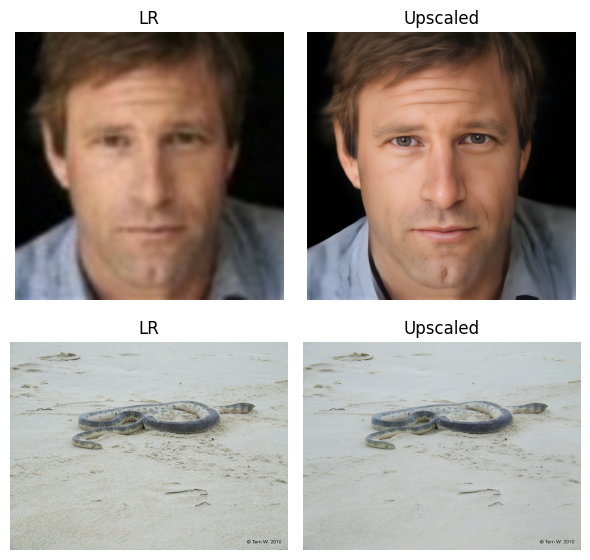

In [35]:
import os, glob
from PIL import Image
import matplotlib.pyplot as plt

# New: look for upscaled versions in the HR folder
def find_upscaled(lr_path):
    filename = os.path.basename(lr_path)  # e.g., "image1.jpg"
    name, ext = os.path.splitext(filename)
    pattern = os.path.join("HR", name + "*upscaled*" + ext)
    candidates = glob.glob(pattern)
    return candidates[0] if candidates else None

# Load all LR image paths from LR/
lr_paths = [
    p for p in sorted(glob.glob('LR/*'))
    if os.path.splitext(p)[1].lower() in ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')
]

fig, axs = plt.subplots(len(lr_paths), 2, figsize=(6, 3 * len(lr_paths)))
if len(lr_paths) == 1:
    axs = [axs]

for i, lr in enumerate(lr_paths):
    up = find_upscaled(lr)
    if not up:
        print(f"⚠️ No upscaled version found for {lr}")
        continue

    lr_img = Image.open(lr)
    up_img = Image.open(up)

    ax_lr, ax_up = axs[i]
    ax_lr.imshow(lr_img)
    ax_lr.axis('off')
    ax_lr.set_title('LR')

    ax_up.imshow(up_img)
    ax_up.axis('off')
    ax_up.set_title('Upscaled')

plt.tight_layout()
plt.show()


In [39]:
import os
import glob
from PIL import Image
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as compare_psnr

def to_numpy(img):
    """Convert PIL image to NumPy array (float32 in [0, 255])"""
    return np.array(img).astype(np.float32)

# Input/output folders
lr_folder = 'LR'
hr_folder = 'HR'

# Get all original images from LR
lr_paths = [
    p for p in glob.glob(os.path.join(lr_folder, "*"))
    if p.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))
    and '__upscaled' not in p and '_upscaled' not in p
]

if not lr_paths:
    print("No original images found.")
else:
    psnr_scores = []
    print("PSNR scores (dB):\n")

    for lr_path in lr_paths:
        filename = os.path.basename(lr_path)
        name, ext = os.path.splitext(filename)
        up_path = os.path.join(hr_folder, name + '__upscaled' + ext)

        if not os.path.exists(up_path):
            print(f"❌ Upscaled version not found for: {filename}")
            continue

        # Load and align images
        lr_img = Image.open(lr_path).convert('RGB')
        up_img = Image.open(up_path).convert('RGB')

        if lr_img.size != up_img.size:
            lr_img = lr_img.resize(up_img.size, Image.BICUBIC)

        lr_np = to_numpy(lr_img)
        up_np = to_numpy(up_img)

        psnr = compare_psnr(lr_np, up_np, data_range=255)
        psnr_scores.append(psnr)
        print(f"{filename} → {psnr:.2f} dB")

    if psnr_scores:
        avg_psnr = sum(psnr_scores) / len(psnr_scores)
        print(f"\n📊 Average PSNR: {avg_psnr:.2f} dB")


PSNR scores (dB):

37054504-089d7a00-214d-11e8-8982-ca836f7a4460 (2).jpg → 28.91 dB
ILSVRC2012_val_00000001 (1).JPEG → 30.49 dB

📊 Average PSNR: 29.70 dB
